# Airline Passenger Satisfaction - Model 4: Neural Network
----
### Prepare data

In [1]:
%run ./01_data_prep.ipynb
%run ./utils.ipynb

### Run Classifier: NN
#### Try to select best hyperparameters

In [2]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# compare MAE with differing values of hyperparameters alpha and max_iter

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid={
        'alpha': [0.001, 0.005, 0.01, 0.05, 0.1],
        'learning_rate_init': [0.001, 0.005, 0.01, 0.05, 0.1]
    },
    scoring=scoring, refit='AUC', return_train_score=True, n_jobs=4
)
gs.fit(X_train, y_train)
results = gs.cv_results_

# 11683.2s

## Plot results

{'alpha': 0.001, 'learning_rate_init': 0.005}


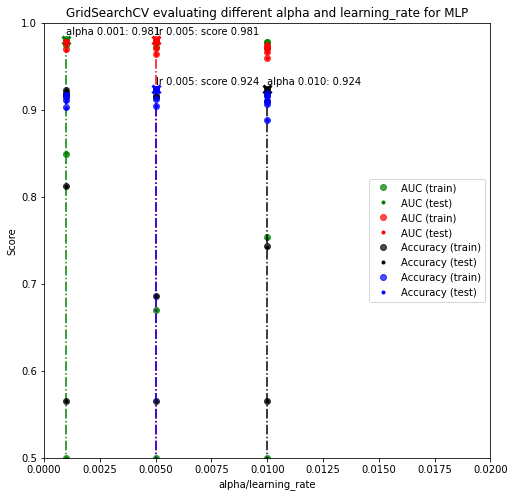

In [11]:
plt.figure(figsize=(8, 8))
# plt.grid()
plt.title("GridSearchCV evaluating different alpha and learning_rate for MLP")

plt.xlabel("alpha/learning_rate")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 0.02)
ax.set_ylim(0.5, 1)

# Get the regular numpy array from the MaskedArray
X_axis_alpha = np.array(results['param_alpha'].data, dtype=float)
X_axis_lr = np.array(results['param_learning_rate_init'].data, dtype=float)

for scorer, color in zip(sorted(scoring), [True, False]):
    train_style = 'o'
    test_style = '.'
    # --------------
    # Alpha
    # --------------
    for sample, style in (('train', train_style), ('test', test_style)):
        sample_score_mean = results[f'mean_{sample}_{scorer}']
        sample_score_std = results[f'std_{sample}_{scorer}']
        alpha_color = 'g' if color else 'k'
        ax.plot(
            X_axis_alpha,
            sample_score_mean,
            style,
            color=alpha_color,
            alpha=1 if sample == 'test' else 0.7,
            label="%s (%s)" % (scorer, sample))

    best_index_alpha = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score_alpha = results['mean_test_%s' % scorer][best_index_alpha]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [X_axis_alpha[best_index_alpha], ] * 2,
        [0, best_score_alpha],
        linestyle='-.',
        color=alpha_color,
        marker='x',
        markeredgewidth=3,
        ms=8
    )

    # Annotate the best score for that scorer
    ax.annotate(
        "alpha %0.3f: %0.3f" % (X_axis_alpha[best_index_alpha], best_score_alpha),
        (X_axis_alpha[best_index_alpha], best_score_alpha + 0.005)
    )

    # --------------
    # Learning Rate
    # --------------
    for sample, style in (('train', train_style), ('test', test_style)):
        sample_score_mean = results[f'mean_{sample}_{scorer}']
        sample_score_std = results[f'std_{sample}_{scorer}']
        lr_color = 'r' if color else 'b'
        ax.plot(
            X_axis_lr,
            sample_score_mean,
            style,
            color=lr_color,
            alpha=1 if sample == 'test' else 0.7,
            label="%s (%s)" % (scorer, sample))

    best_index_lr = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score_lr = results['mean_test_%s' % scorer][best_index_lr]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [X_axis_lr[best_index_lr], ] * 2,
        [0, best_score_lr],
        linestyle='-.',
        color=lr_color,
        marker='x',
        markeredgewidth=3,
        ms=8
    )

    # Annotate the best score for that scorer
    ax.annotate(
        "lr %0.3f: score %0.3f" % (X_axis_lr[best_index_lr], best_score_lr),
        (X_axis_lr[best_index_lr], best_score_lr + 0.005)
    )

print(gs.best_params_)
plt.legend(loc="best")
plt.grid(False)
plt.show()

## Learning Curve
Using the previous results, we set alpha=0.001 and learning_rate_init=0.005

<Figure size 576x576 with 0 Axes>

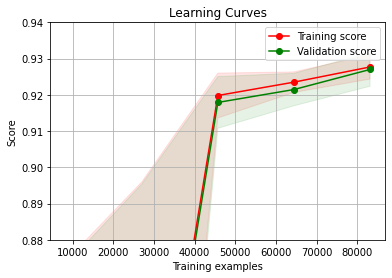

In [18]:
model = MLPClassifier(alpha=0.001, learning_rate_init=0.005)

title = "Learning Curves"
plt.figure(figsize=(8, 8))
plot_learning_curve(model, title, X_train, y_train, ylim=(0.88, 0.94), n_jobs=4)

plt.show()